In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')

# clean data of listings table
listings['price'] = listings['price'].str.replace('$', '', regex=False)
listings['price'] = listings['price'].str.replace(',', '')
listings['price'] = listings['price'].astype('float')

# get rid of alienation
listings.drop(listings[listings['accommodates'] == 0].index, inplace=True) # delete rows where accommodates = 0


# clean calendar table
calendar['price'] = calendar['price'].str.replace('$', '', regex=False)
calendar['price'] = calendar['price'].str.replace(',', '')
calendar['price'] = calendar['price'].astype('float')

calendar['adjusted_price'] = calendar['adjusted_price'].str.replace('$', '', regex=False)
calendar['adjusted_price'] = calendar['adjusted_price'].str.replace(',', '')
calendar['adjusted_price'] = calendar['adjusted_price'].astype('float')

calendar['date'] = pd.to_datetime(calendar['date'])

calendar.loc[calendar['available'] == 't', 'available'] = 1
calendar.loc[calendar['available'] == 'f', 'available'] = 0




In [3]:
# define function to find outliers
def find_outliers_IQR(ser:pd.Series, return_filter=False):
   """Take a seri in and return a seri of outliers via IQR method \n
   If return_filter=True -> return a seri of booleans
   """
   q1=ser.quantile(0.25)
   q3=ser.quantile(0.75)
   IQR=q3-q1

   filterer = ((ser<(q1-1.5*IQR)) | (ser>(q3+1.5*IQR)))
   outliers = ser[filterer]

   if return_filter:
      return filterer
   else: return outliers

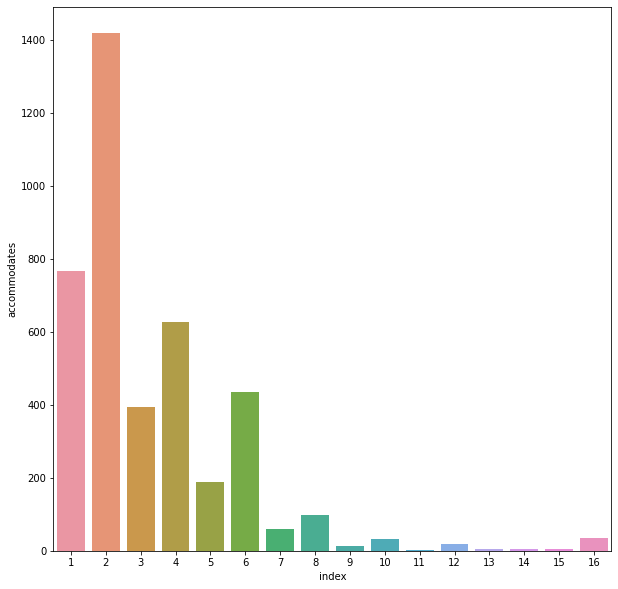

In [4]:
# grouping the number of accommodates
accomodate_no = listings['accommodates'].value_counts()
accomodate_no = accomodate_no.reset_index()

plt.figure(figsize=[10,10])
sns.barplot(data=accomodate_no, x='index', y='accommodates')
plt.show()

In [5]:
# decide number of accomodates into 4 groups
listings.loc[listings['accommodates'] == 1, 'accommodates_group'] = '1'
listings.loc[listings['accommodates'] == 2, 'accommodates_group'] = '2'
listings.loc[(listings['accommodates'] >= 3) & (listings['accommodates'] <= 6), 'accommodates_group'] = '3-6'
listings.loc[listings['accommodates'] >= 7, 'accommodates_group'] = '>= 7'

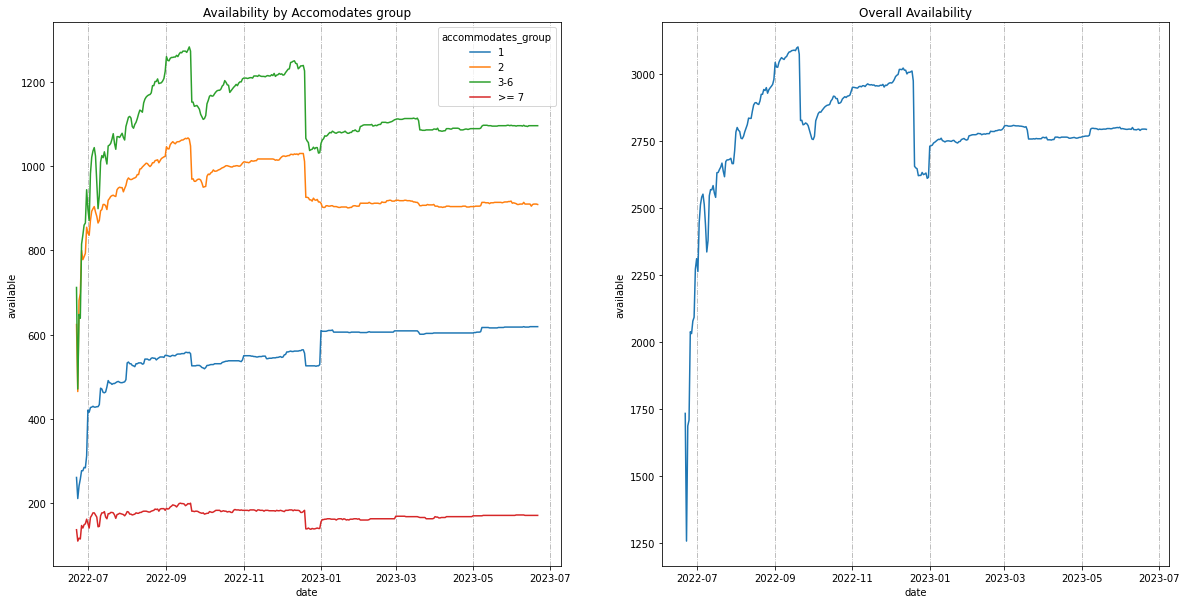

In [6]:
listing_type = listings[['id', 'bedrooms', 'beds', 'accommodates_group']].set_index('id')
tmp = calendar.copy().set_index('listing_id')


visual_acco_group = tmp.join(listing_type)
visual_acco_group = visual_acco_group.groupby(['date', 'accommodates_group'])['available'].sum().reset_index()


plt.figure(figsize=(20, 10))

plt.subplot(121)
sns.lineplot(data=visual_acco_group, x='date', y='available', hue='accommodates_group')
plt.grid(axis='x', linestyle='-.')
plt.title('Availability by Accomodates group')

plt.subplot(122)
sns.lineplot(data=calendar.groupby('date')['available'].sum().reset_index(), x='date', y='available')
plt.grid(axis='x', linestyle='-.')
plt.title('Overall Availability')

plt.show()


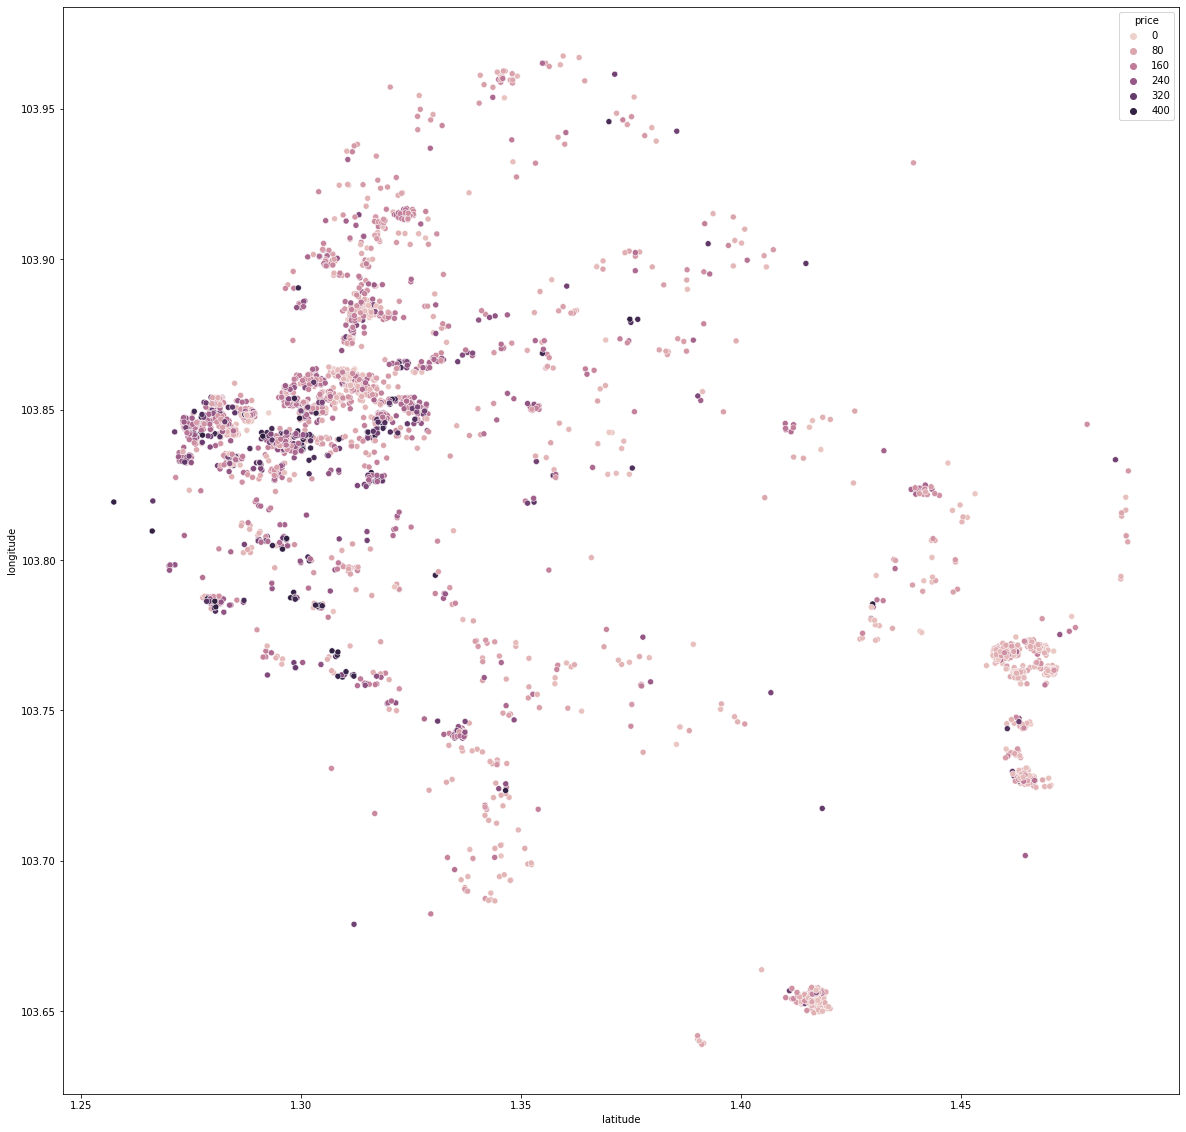

In [22]:
visual_price = listings[['latitude', 'longitude', 'price']].copy()

# remove outliers
visual_price = visual_price[~find_outliers_IQR(visual_price['price'], return_filter=True)]

plt.figure(figsize=(20, 20))
sns.scatterplot(data=visual_price, x='latitude', y='longitude', hue='price')
plt.show()

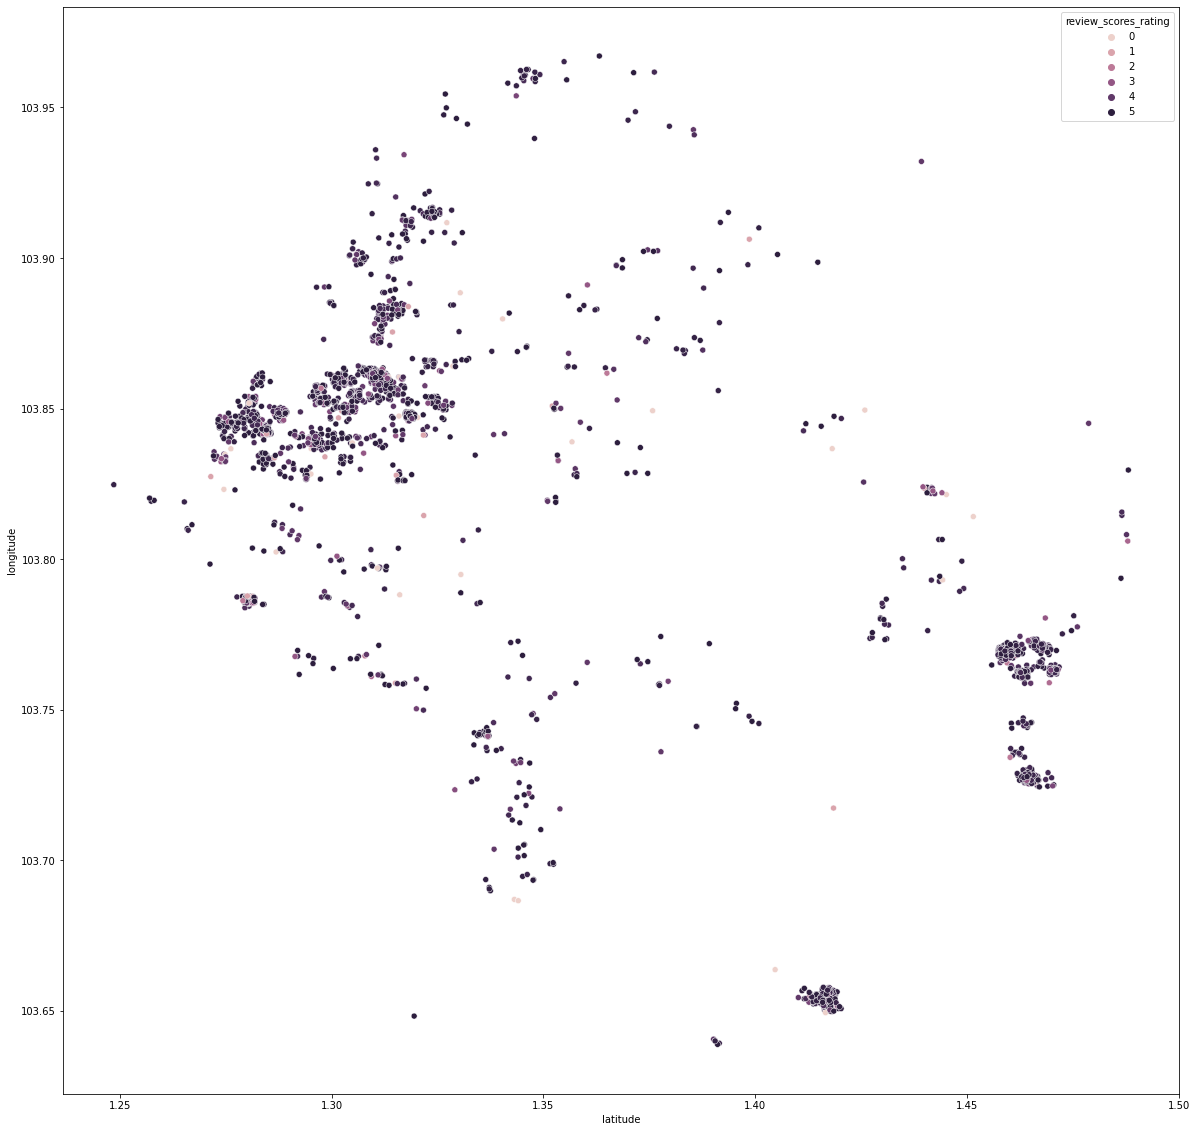

In [5]:
visual_review = listings[['latitude', 'longitude', 'review_scores_rating']].copy()

visual_review['review_scores_rating'] = visual_review['review_scores_rating'].astype('float')

plt.figure(figsize=(20, 20))
sns.scatterplot(data=visual_review, x='latitude', y='longitude', hue='review_scores_rating')
plt.show()